# Pandas

## 0. Überblick
In diesem Skript geht es darum, den Umgang mit dem pandas-Modul in Python. Nach dem Durcharbeiten dieses Skripts solltest du folgendes gelernt haben:

> - Pandas Tabelle basierend auf Listen und Dateien laden
> - Gezielt Spalten (Columns) von Pandas-Tabellen abrufen
> - Pandas Tabellen mit Bedingungen filtern
> - Pandas Tabellen gruppieren und summarieren

## 1. Pandas Laden und Tabelle erstellen

**Pandas** ist eine sogenannte Library (Bibliothek). Wir müssen diese Bibliothek zuerst laden, bevor wir sie verwenden können. Das passiert mit dem Code `import pandas`. Damit wir nicht immer den Schlüsselbegriff `pandas` eintippen müssen, können wir der Bibliothek auch ein Kürzel geben. Wir geben der Bibliothek das Kürzel **pd** und zwar mit dem Code `import pandas as pd`. 

> 1. Führe die nächste Code-Zeile `pd` aus. Sie wird zu einem Fehler führen, da der Begriff pd noch nicht definiert ist.
> 2. Führe danach `import pandas as pd` aus.
> 3. Wenn du nun nochmals die Code-Zeile `pd` ausführst, sollte der Ort angezeigt werden, von welchem die Bibliothek geladen wurde.

In [1]:
import pandas as pd

Nun wollen wir eine erste Tabelle mit Pandas erstellen. In der Pandas-Sprache ist dies ein **DataFrame**. Wir können eine Tabelle aus Listen erstellen oder direkt ein Dokument einlesen.

**Pandas DataFrame aus Listen**

Grundsätzlich erzeugt der befehl `pd.DataFrame()` eine leere Tabelle. Dabei ist `pd` das Kürzel für die Bibliothek und `.DataFrame()` der Befehl um eine Tabelle zu erstellen. Die Tabelle ist leer, weil in den Klammern auch nichts steht.

Damit eine nicht leere Tabelle entsteht müssen wir in den Klammern ein sogenanntes Argument mitgeben. Pandas erkennt dabei Listen in Listen als Tabellen.

> 1. Führe die folgende Code-Zeile aus und versuche sie nachzuvollziehen.
> 2. Wie du sehen wirst, hat die Tabelle nun die Rows (Zeilen) und die Columns (Spalten) mit einem Index durchnummeriert. Wenn wir den Columns Namen geben möchten, können wir diese als Liste mitgeben. Ersetze das Argument in den Klammern mit dem Befehl `table, columns=["a", "b", "c"]` und führe die Zelle nochmals aus. Siehst du den Unterschied und kannst ihn nachvollziehen?

In [2]:
table = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

df_1 = pd.DataFrame(table, columns=["a", "b", "c"])

df_1

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


**Pandas DataFrame aus Dokumenten**
 
Of wollen wir jedoch nicht mühselig Listen aus Listen erstellen, sondern Dokumente direkt einlesen. Wir verwenden das Dokument unter dieser URL: https://raw.githubusercontent.com/rashida048/Datasets/master/home_data.csv

> 1. Öffne die URL in deinem Browser und schau dir die Quelldatei an.
> 2. Der Befehl `pd.read_csv(url)` erstellt ein DataFrame aus einem Dokument. Dabei erkennt Pandas meistens automatisch, wie die Tabelle aufgebaut ist und verwendet die erste Zeile als Titel der Columns. Nutze nun die nächste Zelle um der Variable `df_2` ein DataFrame mit dem Inhalt der Tabelle unter der angegebenen URL zuzuweisen. Lasse dir die Variable im Anschluss anzeigen.
>> *Tipp 1: Die URL muss als String ausgegeben werden.*
>>
>> *Tipp 2: Um das DataFrame anzuschauen kannst du einfach die Variable `df_2` am Ende der Codezelle platzieren.*

In [3]:
df_2 = pd.read_csv('https://raw.githubusercontent.com/rashida048/Datasets/master/home_data.csv')

Gratulation. Das von dir geladene Datenset ist ein bekanntes Trainingsdatenset. Es enthält über 21 Tausend Einträge (Rows), von welchen jeder für ein Haus in der USA steht. Wir werden uns diesen Datensatz im Laufe dieser Übung genauer anschauen.

## 2. Auf Columns zugreifen
Wir haben erfolgreich die Variablen `df_1` und `df_2` mit DataFrames befüllt. Nun wollen wir mit diesen aber auch interageiren. Als erstes wollen wir bestimmte Columns auswählen.

Pandas orientiert sich an der Notation von Listen. Mit den eckigen Klammern **[ ]** können eine oder mehrere Columns selektiert werden. Zum Beispiel könnte die Column *my_column* von der Tabelle *my_table* mit dem Befehl `my_table["my_column"]` abgerufen werden.

> 1. Führe die nächste Code-Zeile aus und lasse dir die Spaltentitel der Tabelle df_2 anzeigen.

In [4]:
df_2.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

> 2. Lasse dir nun in der nächsten Code-Zeile die Column mit den Badezimmern des `df_2` anzeigen.

In [5]:
df_2['bathrooms']

0        1.00
1        2.25
2        1.00
3        3.00
4        2.00
         ... 
21608    2.50
21609    2.50
21610    0.75
21611    2.50
21612    0.75
Name: bathrooms, Length: 21613, dtype: float64

Um mehrere Columns auszuwählen kann den Eckigen Klammern eine Liste übergeben werden. So können zum Beispiel die Columns *my_column_1* und *my_column_2* von der Tabelle *my_table* mit dem Befehl `my_table[["my_column_1", "my_column_2"]]` abgerufen werden.

> 3. Lasse dir in der nächsten Zelle die zwei Columns für Schlafzimmer und Badezimmer aus der Tabelle `df_2` anzeigen.

In [6]:
df_2[['bedrooms', 'bathrooms']]

,bedrooms,bathrooms
0,3,1.00
1,3,2.25
2,2,1.00
3,4,3.00
4,3,2.00
...,...,...
21608,3,2.50
21609,4,2.50
21610,2,0.75
21611,3,2.50


Eine Column kann auch überschrieben oder neu erstellt werden. So überschreibt der Befehl

`my_df['my_column'] = 4`

Alle Einträge der Column `my_column` im DataFrame `my_df` mit dem Wert `4`. Wenn die Column `my_column` noch nicht existiert, dann wird sie neu erstellt.

> 1. Erstelle im `df_2` eine neue Column mit dem namen `total_rooms`, welche die Anzahl Schlafzimmer und Badezimmer zusammenzählt. Lasse dir im Anschluss die Columns `total_rooms`, `bedrooms` und `bathrooms` anzeigen, um dein Ergebnis zu überprüfen.

In [7]:
df_2['total_rooms'] = df_2['bedrooms'] + df_2['bathrooms']
df_2['total_rooms']

0        4.00
1        5.25
2        3.00
3        7.00
4        5.00
         ... 
21608    5.50
21609    6.50
21610    2.75
21611    5.50
21612    2.75
Name: total_rooms, Length: 21613, dtype: float64

## 3. Auf Rows zugreifen
Nun, da wir mit den Columns umgehen können, kümmern wir uns um die Rows. Rows lassen sich auf zwei Arten selektieren, einerseits mit den Indexen (vgl. Listen) oder über Bedingungen.

**Columns und Rows über Indexe selektieren**
Pandas DataFrames lassen sich wie Listen selektieren.

`my_df.iloc[row_indexes , column_indexes]`


Hierbei ist `my_df` ein DataFrame, `.iloc` der Befehl zur Selektion mit Indexen und inden Eckigen Klammern der Index für Rows, kommagetrennt vom Index für Columns. Wie auch bei Listen kann der Index dabei eine einzelne Zahl sein, oder auch ein Bereich. So entspricht der Ausdruck `0:3` dem Bereich 0, 1, 2. Der Ausdruck `:` kann ebenfalls verwendet werden, was ganz einfach dem gesamten Wertebereich (alle Columns, bzw. alle Rows) entspricht.

> 1. Lasse dir in der folgenden Code-Zelle den Eintrag an der Position `[0, 3]` ausgeben. Um was für einen Wert handelt es sich hier?
> 2. Lasse dir in der nächsten Code-Zelle die ersten 5 Rows mit allen Columns ausgeben.

In [8]:
df_2.iloc[0, 3] # 0 entspricht dem ersten Haus, 3 entspricht der Column mit dem Index 3 (bedrooms)

3

In [9]:
df_2.iloc[0:5, :]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,total_rooms
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,4.00
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,5.25
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,3.00
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,7.00
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,5.00


**Rows mit Bedingungen auswählen**

Um Rows mit Bedingungen auszuwählen muss den Eckigen Klammern eine Reihe von Wahrheitswerten mitgegeben werden.

>1. Führe die nächste Code-Zelle aus und versuche sie nachzuvollziehen. Wir wählen die Schlafzimmer der Häuser aus und überprüfen, ob die Zahl grösser als 6 ist. Das ausgegebene Resultat ist ein Wahrheitswert (True oder False) für jede Row.

In [10]:
df_2['bedrooms'] > 3

0        False
1        False
2        False
3         True
4        False
         ...  
21608    False
21609     True
21610    False
21611    False
21612    False
Name: bedrooms, Length: 21613, dtype: bool

>2. Führe nun die folgende Zelle aus und versuche sie nachzuvollziehen. Wir vergleichen wiederum die Schlafzimmer mit der Nummer 6, allerdings übergeben wir die daraus resultierende Liste mit Wahrheitswerten in die Eckigen klammern. Pandas gibt uns nun alle Rows zurück, welche dem Wahrheitswert *True* entsprechen. Wie viele Häuser entsprechen dieser Bedingung?


In [11]:
df_2[df_2['bathrooms'] > 6]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,total_rooms
4024,9175600025,20141007T000000,800000,7,6.75,7480,41664,2.0,0,2,...,5080,2400,1953,0,98166,47.4643,-122.368,2810,33190,13.75
7252,6762700020,20141013T000000,7700000,6,8.00,12050,27600,2.5,0,3,...,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,14.00
8092,1924059029,20140617T000000,4668000,5,6.75,9640,13068,1.0,1,4,...,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454,11.75
8546,424049043,20140811T000000,450000,9,7.50,4050,6504,2.0,0,0,...,4050,0,1996,0,98144,47.5923,-122.301,1448,3866,16.50
9254,9208900037,20140919T000000,6885000,6,7.75,9890,31374,2.0,0,4,...,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730,13.75
12777,1225069038,20140505T000000,2280000,7,8.00,13540,307752,3.0,0,4,...,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800,15.00
14556,2303900035,20140611T000000,2888000,5,6.25,8670,64033,2.0,0,4,...,6120,2550,1965,2003,98177,47.7295,-122.372,4140,81021,11.25
18302,6072800246,20140702T000000,3300000,5,6.25,8020,21738,2.0,0,0,...,8020,0,2001,0,98006,47.5675,-122.189,4160,18969,11.25
20578,424069279,20150328T000000,1180000,6,6.50,6260,10955,2.0,0,0,...,4840,1420,2007,0,98075,47.5947,-122.039,2710,12550,12.50
21506,2524069097,20140509T000000,2238888,5,6.50,7270,130017,2.0,0,0,...,6420,850,2010,0,98027,47.5371,-121.982,1800,44890,11.50


Im übrigen können mehrere Bedingungen mit dem **&**-Zeichen kombiniert werden. Hierfür müssen die einzelnen Bedingungen in runde Klammern gesetzt werden. Der Befehl 

`df_2[(df_2['bedrooms'] > 6) & (df_2['bathrooms'] < 2)]`

Würde also alle Häuser Auswählen, welche mehr al 6 Schlafzimmer und weniger als 2 Badezimmer besitzen. Im übrigen sind für uns die folgenden Vergleichszeichen wichtig:

- **x > y** | x grösser y
- **x < y** | x kleiner y
- **x == y** | x gleich y

> 3. Lasse dir in der nächsten Codezeile alle Häuser ausgeben, welche teurer als 1'000'000 Dollars sind (`price`) und weniger als 2 Badezimmer besitzen.

In [12]:
df_2[(df_2['price'] > 1000000) & (df_2['bathrooms'] < 2)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,total_rooms
627,8925100390,20150406T000000,1042500,3,1.75,1900,9375,1.0,0,1,...,1330,570,1941,0,98115,47.6821,-122.273,2760,9375,4.75
639,6379500640,20150409T000000,1120000,3,1.50,3000,5750,2.0,0,0,...,2000,1000,1924,0,98116,47.5821,-122.390,1820,5750,4.50
875,6306400140,20140612T000000,1095000,0,0.00,3064,4764,3.5,0,2,...,3064,0,1990,0,98102,47.6362,-122.322,2360,4000,0.00
891,1962200435,20141110T000000,1010000,4,1.00,1820,5400,1.5,0,0,...,1820,0,1923,2014,98102,47.6476,-122.318,1820,5400,5.00
1123,7237501180,20140625T000000,1200000,4,1.75,3990,13470,2.0,0,0,...,3990,0,2006,0,98059,47.5305,-122.131,5790,13709,5.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18685,3325069064,20150326T000000,1052000,3,1.00,1860,44431,1.0,0,0,...,1860,0,1947,0,98074,47.6057,-122.038,2000,44431,4.00
18876,9808700025,20150211T000000,1500000,3,1.50,1910,21374,1.0,0,0,...,1910,0,1955,0,98004,47.6453,-122.214,2850,16167,4.50
19471,2566300100,20150327T000000,1388000,5,1.75,2650,11340,1.0,0,0,...,2650,0,1955,0,98004,47.6260,-122.213,2780,13204,6.75
19622,7351200295,20150114T000000,1150000,3,1.75,1760,6788,2.0,1,4,...,1760,0,1940,1960,98125,47.7336,-122.284,1630,7588,4.75


## 4. Columns analysieren
Zum Schluss wollen wir noch ein paar Analysefunktionen kennenlernen. Diese Befehle können auf ein DataFrame angewendet werden und summarieren alle enthaltenen Columns. Folgende Funktionen sind für uns wichtig:

- **.sum()** | Summiere alle Rows pro Column
- **.mean()** | Berechne den Mittelwert aller Rows pro Column
- **.max()** | Suche den maximalen Wert pro Column
- **.min()** | Suche den minimalen Wert pro Column

> 1. Führe die folgende Zelle aus. Was ist der tiefste Preis, für den du eines der Häuser kaufen könntest.

In [13]:
df_2.min()

id                       1000102
date             20140502T000000
price                      75000
bedrooms                       0
bathrooms                    0.0
sqft_living                  290
sqft_lot                     520
floors                       1.0
waterfront                     0
view                           0
condition                      1
grade                          1
sqft_above                   290
sqft_basement                  0
yr_built                    1900
yr_renovated                   0
zipcode                    98001
lat                      47.1559
long                    -122.519
sqft_living15                399
sqft_lot15                   651
total_rooms                  0.0
dtype: object

> 2. Verwende die folgende Codezeile um herauszufinden, wie viel das teuerste Haus in der Liste kostet.

In [14]:
df_2['price'].max()

7700000

## 5. Übungen

>1. Angenommen, du möchtest ein Haus mit genau 7 Schlafzimmern kaufen. Was ist der durchschnittliche Preis, mit welchem du rechnen musst?

In [15]:
df_2[df_2['bedrooms'] == 7]['price'].mean()

951184.6578947369

>2. Wie viele Häuser gibt es, welche nach 1950 gebaut wurden (`yr_built`)?

In [16]:
#Lösung mit count()
df_2[df_2['yr_built'] > 1950].count()

#Alternativ mit Column fürs Zählen
df_2['counter'] = 1
df_2[df_2['yr_built'] > 1950]['counter'].sum()

16426

>3. Wie viele Häuser gibt es, welche vor 1950 gebaut wurden, daber noch keine Renovation erfahren haben? Bei nicht renovierten Häusern ist der Wert in `yr_renovated` 0.

In [17]:
df_2[(df_2['yr_built'] < 1950) & (df_2['yr_renovated'] == 0)].count()

id               4359
date             4359
price            4359
bedrooms         4359
bathrooms        4359
sqft_living      4359
sqft_lot         4359
floors           4359
waterfront       4359
view             4359
condition        4359
grade            4359
sqft_above       4359
sqft_basement    4359
yr_built         4359
yr_renovated     4359
zipcode          4359
lat              4359
long             4359
sqft_living15    4359
sqft_lot15       4359
total_rooms      4359
counter          4359
dtype: int64

>4. Haben Häuser mit einem Baujahr vor 1980 mehr oder weniger Zimmer insgesammt (Schlafzimmer + Badezimmer) als Häuser mit einem Baujahr 1980 oder höher?

In [18]:
df_2['total_rooms']

val_1 = df_2[df_2['yr_built'] < 1980]['total_rooms'].mean()
val_2 = df_2[df_2['yr_built'] > 1979]['total_rooms'].mean()

print('Durchschnitt vor 1980:', val_1, 'Durchschnitt nach 1980', val_2)

Durchschnitt vor 1980: 5.078016053186314 Durchschnitt nach 1980 6.027373639400797


> 5. Erstelle eine neue Column mit dem Namen `scetchy`. Diese Column soll den Wert 1 haben, wenn ein Haus älter ist, als Baujahr 1950, aber noch nie renoviert wurde. Alle andern Häuser sollen den Wert 0 haben.

In [19]:
# Eine von vielen Möglichkeiten

scetchy_val = (df_2['yr_built'] < 1950) & (df_2['yr_renovated'] == 0)

scetchy = []

for val in scetchy_val:
    if val == True:
        scetchy.append(1)
    else:
        scetchy.append(0)
        
df_2['scetchy'] = scetchy

print('Anzahl Häuser mit Attribut "scetchy":', df_2['scetchy'].sum())

Anzahl Häuser mit Attribut "scetchy": 4359


## 6. Prüfungsrelevantes Wissen
Für die Prüfung solltest du in der Lage sein:

- Eine oder mehrere Columns eines Pandas DataFrame auswählen
- Rows gemäss Index auswählen
- Rows gemäss einer Bedingung (<, >, ==) auswählen)
- sum, max, min, mean auf eine Auswahl von Rows/Columns anwenden

## 7. For fun
Aus Pandas lassen sich auch direkt Plots erstellen. Dazu muss der folgende Syntax befolgt werden:

`my_df.plot.scatter(x='col_1', y='col_2)`

Das bedeutet, dass wir aus dem DataFrame `df_2` mit dem Befehl `.plot.scatter()` einen Plot machen möchten. In den Klammern definieren wir, dass `col_1` auf der x-Achse und `col_2` auf der y-Achse liegen soll. 

Das folgende Beispiel vergleicht die Anzahl Badezimmer mit den Schlafzimmern pro Haus.

<AxesSubplot:xlabel='bedrooms', ylabel='bathrooms'>

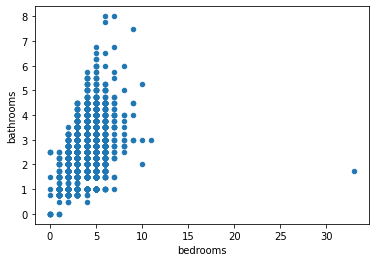

In [23]:
df_2.plot.scatter(x='bedrooms', y='bathrooms')

> 1. Kannst du anhand einer Visualisation (also einm Plott) erklären, welcher Einfluss die Column `waterfront` auf den Preis hat?